In [330]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import scipy
from scipy import stats as st
#Импортируем все что может понадобится

In [331]:
df = pd.read_csv('/datasets/games.csv')

In [332]:
df.head(30)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [334]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

array([[<AxesSubplot:title={'center':'year_of_release'}>,
        <AxesSubplot:title={'center':'na_sales'}>],
       [<AxesSubplot:title={'center':'eu_sales'}>,
        <AxesSubplot:title={'center':'jp_sales'}>],
       [<AxesSubplot:title={'center':'other_sales'}>,
        <AxesSubplot:title={'center':'critic_score'}>]], dtype=object)

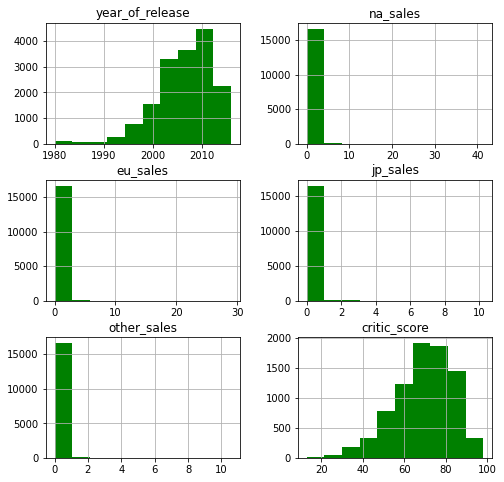

In [335]:
df.hist(figsize=(8, 8), color='green')

In [336]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Начнем по порядку

In [337]:
df = df.dropna(subset=['name']).reset_index(drop=True)
df = df.dropna(subset=['genre']).reset_index(drop=True)


In [338]:
df['name']

0                           Wii Sports
1                    Super Mario Bros.
2                       Mario Kart Wii
3                    Wii Sports Resort
4             Pokemon Red/Pokemon Blue
                     ...              
16708    Samurai Warriors: Sanada Maru
16709                 LMA Manager 2007
16710          Haitaka no Psychedelica
16711                 Spirits & Spells
16712              Winning Post 8 2016
Name: name, Length: 16713, dtype: object

Много слов в верхнем регистре, уберем в данном столбце и других

In [339]:
df['name'].str.lower()
df['platform'].str.lower()
df['genre'].str.lower()

0              sports
1            platform
2              racing
3              sports
4        role-playing
             ...     
16708          action
16709          sports
16710       adventure
16711        platform
16712      simulation
Name: genre, Length: 16713, dtype: object

In [340]:

#for i in df['name']:
#    df['name'] == i
#    df['year_of_release'].fillna(df['year_of_release'].median())
     
df['year_of_release'].isna().mean()

0.016095255190570215

Меньше двух процентов пропусков, можно удалить

In [341]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

In [342]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [343]:
df['critic_score'].isna().mean()

0.5145341765993675

In [344]:
df['critic_score'] = df['critic_score']/10 #Пусть соответствует df['user_score']

In [345]:
df['user_score'].isna().mean()

0.4016662612503041

In [346]:
df['rating'].isna().mean()

0.40598394551204087

В столбцах user_score, rating, critic_score, пропусков от 40 до 50 процентов. К сожалению заменить их нечем придется оставлять.

In [347]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16439     0.01
16440     0.01
16441     0.01
16442     0.01
16443     0.01
Name: total_sales, Length: 16444, dtype: float64

Судя по всему tbd это to be determined с англ. "предстоит определить", то есть фактически это тот же Nan, для простоты заменим tbd на Nan

In [348]:

df.loc[df['user_score'] == 'tbd' , 'user_score'] = np.nan


In [349]:
df['user_score']=df['user_score'].astype('float')

In [350]:
df.duplicated().sum()

0

В ходе предобработки данных были удалены пропуски, где это возможно, в некоторых столбцах был снижен регистр слов, также был добавлен новый столбец total_sales. Дубликатов в данных выявлено не было

In [351]:
total_year = df.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
total_year

,total_sales
year_of_release,
1980,11.38
1981,35.68
1982,28.88
1983,16.80
1984,50.35
1985,53.95
1986,37.08
1987,21.70
1988,47.21


<AxesSubplot:xlabel='year_of_release'>

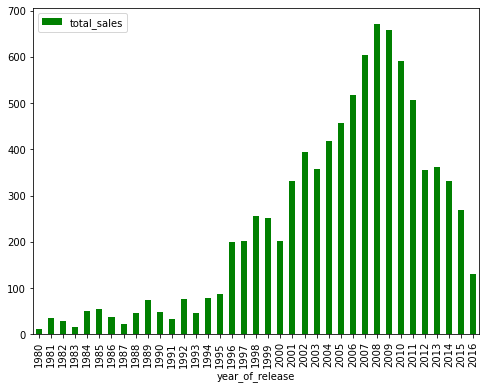

In [352]:
total_year.plot(kind='bar', figsize=(8, 6), color='green')

Отбросим годы, когда игры продавались в незначительном количестве

In [353]:
df = df.query('year_of_release > 1995')

In [354]:
df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,685.59
PS4,314.14
GBA,312.88
PSP,289.53


Сформируем датафрейм по топ платформам. И включим PC как стандартную платформу и Xone, так как она понадобится дальше для исследования

In [355]:
top_9=['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'PC', 'XOne']
df_top = df.query('platform in @top_9')

In [356]:
df.pivot_table(index=['year_of_release', 'platform'] , values='total_sales', aggfunc='sum').tail(30) 

total_sales
year_of_release platform             
2013            XOne            18.96
2014            3DS             43.76
                PC              13.28
                PS3             47.76
                PS4            100.00
                PSP              0.24
                PSV             11.90
                Wii              3.75
                WiiU            22.03
                X360            34.74
                XOne            54.07
2015            3DS             27.78
                PC               8.52
                PS3             16.82
                PS4            118.90
                PSP              0.12
                PSV              6.25
                Wii              1.14
                WiiU            16.35
                X360            11.96
                XOne            60.14
2016            3DS             15.14
                PC               5.25
                PS3              3.60
                PS4             69.25
                PSV              4.25
                Wii              0.18
                WiiU             4.60
                X360             1.52
                XOne            26.15

<AxesSubplot:xlabel='year_of_release'>

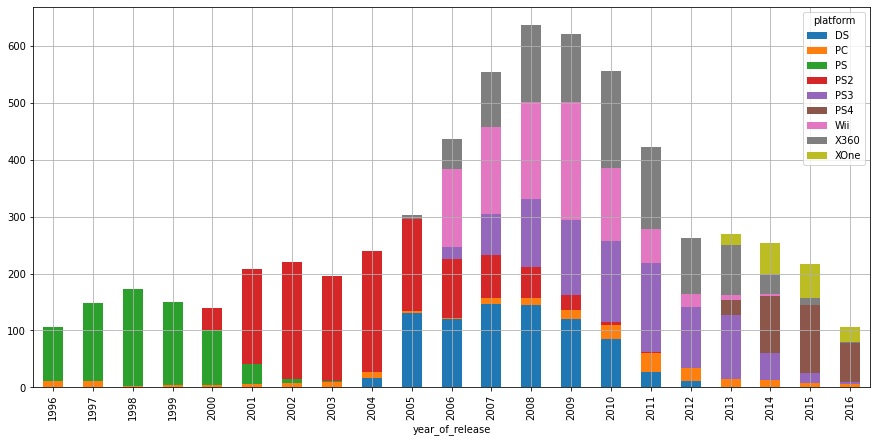

In [357]:

df_top.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot.bar(stacked=True, figsize=(15, 7), grid=True)


Из гистограммы мы видем на примере PS, Wii, DS и PS2, что срок жизни платформ около 8-9 лет. Новые же платформы начинают активно продаваться в течении 4-5 лет.

В качестве актуального периода имеет смысл брать только ближайшие годы, зная как быстро все меняется и с учетом 8-9 лет жизни платформы и активных продаж в течении 4-5 лет. Возьму 2012-2016 годы 

In [358]:
df_2014 = df_top.query('2014 <= year_of_release')

<AxesSubplot:xlabel='year_of_release'>

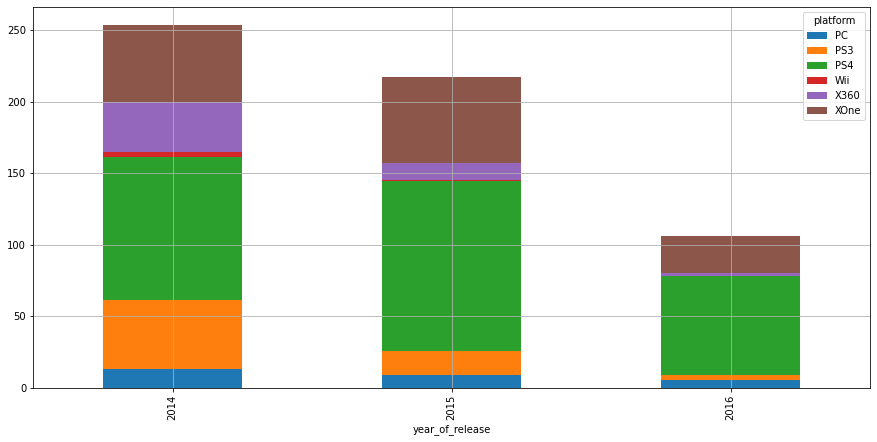

In [359]:
df_2014.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot.bar(stacked=True, figsize=(15, 7), grid=True)

(0.0, 2.0)

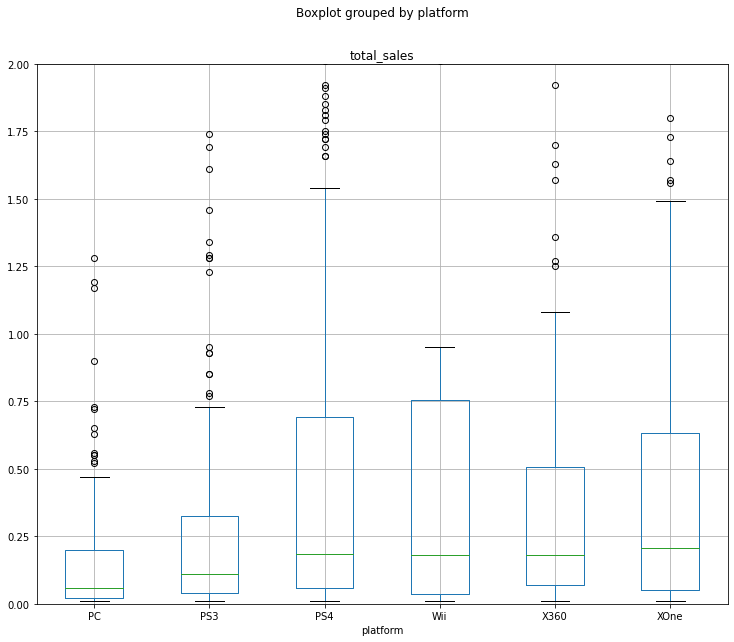

In [360]:
df_2014.boxplot(column='total_sales', by='platform', figsize=(12, 10))
plt.ylim(0, 2)

Из гистограммы и диаграммы рассения можно увидеть, что наибольшую популярность обретает PS4, XOne (на boxplot у нее много ввыбросов, что объясняется недавней популярностью), но в целом продажи игр падают. Самая стабильная платформа РС (однако стабильно низкие продажи, но тем не менее она долго существует). Медианно по продажам больше всего выделяется XOne, у него самая высокая медиана

In [361]:
df_2014.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.157153,-0.117810,-0.045612,-0.122185,0.054391,0.025968,-0.144231
na_sales,-0.157153,1.000000,0.711683,0.227763,0.846567,0.341282,-0.030008,0.906628
eu_sales,-0.117810,0.711683,1.000000,0.314419,0.927515,0.276937,-0.025681,0.937550
jp_sales,-0.045612,0.227763,0.314419,1.000000,0.367558,0.215621,0.159867,0.352904
other_sales,-0.122185,0.846567,0.927515,0.367558,1.000000,0.298577,-0.010505,0.973998
critic_score,0.054391,0.341282,0.276937,0.215621,0.298577,1.000000,0.495443,0.334676
user_score,0.025968,-0.030008,-0.025681,0.159867,-0.010505,0.495443,1.000000,-0.020109
total_sales,-0.144231,0.906628,0.937550,0.352904,0.973998,0.334676,-0.020109,1.000000


Корреляция total_sales к user_score: -0.007681, total_sales к critic_score 0.307395, что говорит о незначительном влиянии critic_score, отсутствии влияния user_score

In [362]:
df_ps4 = df_2014.query('platform == "PS4"')

In [363]:
df_ps4['total_sales'].corr(df_ps4['user_score'])

-0.040131589472697356

In [364]:
df_ps4['total_sales'].corr(df_ps4['critic_score'])

0.4026614106810408

При выборе конкретной платформы немного изменилась корреляция для отзывов критиков, но тем не менее 0.4 это незначительная корреляция

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

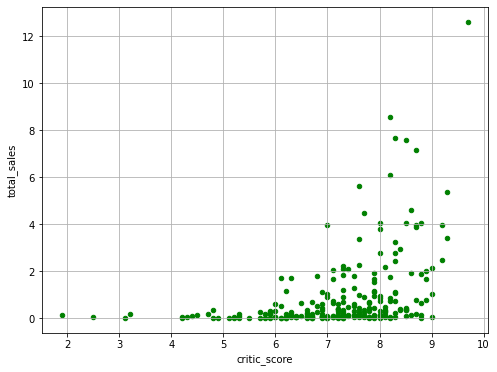

In [365]:
#df_ps4.plot(y='total_sales', x='critic_score', kind='hexbin', gridsize=20, sharex=False, grid=True, figsize=(8, 6))
df_ps4.plot(y='total_sales', x='critic_score', kind='scatter', grid=True, figsize=(8, 6), color='green')

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

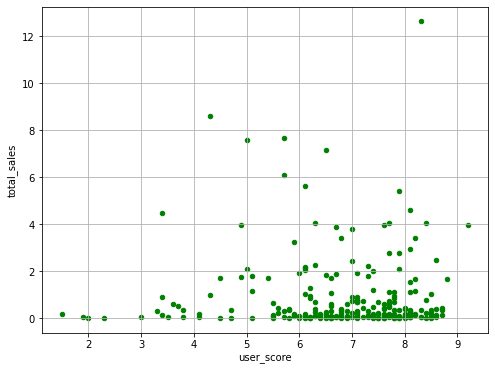

In [366]:
#df_ps4.plot(y='total_sales', x='user_score', kind='hexbin', gridsize=20, sharex=False, grid=True, figsize=(8, 6))
df_ps4.plot(y='total_sales', x='user_score', kind='scatter', grid=True, figsize=(8, 6), color='green')

Проверим X360

In [367]:
df_X360 = df_2014.query('platform == "X360"')

In [368]:
df_X360['total_sales'].corr(df_X360['critic_score'])

0.5257228356581523

In [369]:
df_X360['total_sales'].corr(df_X360['user_score'])

-0.138444570945665

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

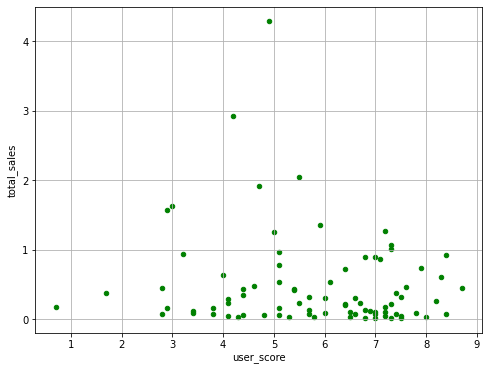

In [370]:
#df_X360.plot(y='total_sales', x='user_score', kind='hexbin', gridsize=20, sharex=False, grid=True, figsize=(8, 6))
df_X360.plot(y='total_sales', x='user_score', kind='scatter', grid=True, figsize=(8, 6), color='green')

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

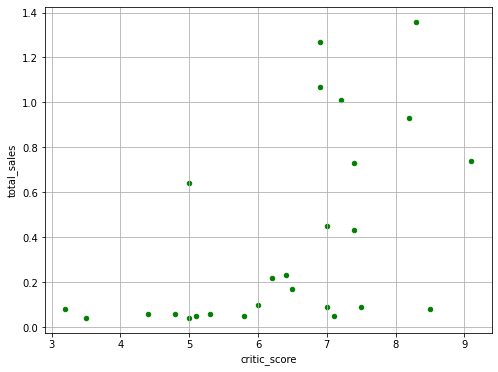

In [371]:
#df_X360.plot(y='total_sales', x='critic_score', kind='hexbin', gridsize=20, sharex=False, grid=True, figsize=(8, 6))
df_X360.plot(y='total_sales', x='critic_score', kind='scatter', grid=True, figsize=(8, 6), color='green')

Проверим XOne

In [372]:
df_XOne = df_2014.query('platform == "XOne"')

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

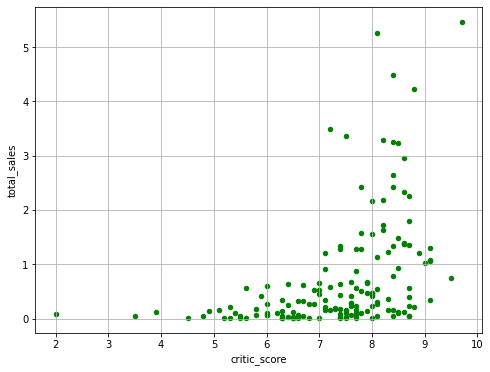

In [373]:
#df_XOne.plot(y='total_sales', x='critic_score', kind='hexbin', gridsize=20, sharex=False, grid=True, figsize=(8, 6))
df_XOne.plot(y='total_sales', x='critic_score', kind='scatter', grid=True, figsize=(8, 6), color='green')

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

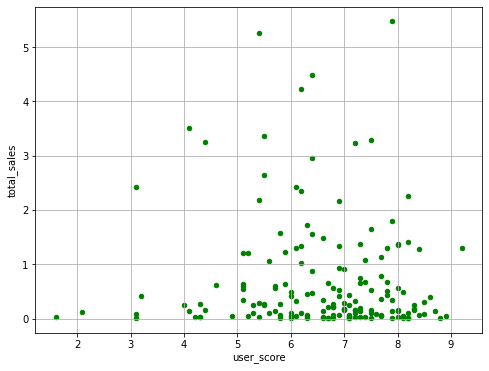

In [374]:
#df_XOne.plot(y='total_sales', x='user_score', kind='hexbin', gridsize=20, sharex=False, grid=True, figsize=(8, 6))
df_XOne.plot(y='total_sales', x='user_score', kind='scatter', grid=True, figsize=(8, 6), color='green')

   Можно сделать вывод, что оценки пользователей практически не играют роли, в свою очередь оценки критиков оказывают влияние на продажи, хоть и небольшое.

In [375]:
df_genre = df_2014.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)
df_genre

,total_sales
genre,
Shooter,165.47
Action,159.64
Sports,106.05
Role-Playing,53.80
Misc,25.66
Racing,20.33
Fighting,13.55
Adventure,13.47
Simulation,8.95


<AxesSubplot:xlabel='genre'>

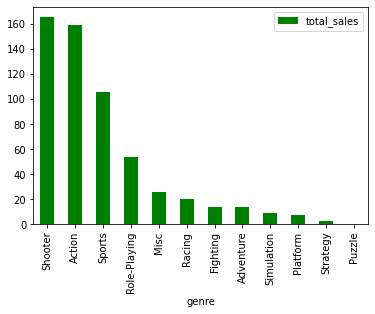

In [376]:

df_genre.plot(kind='bar', alpha=1, color='green')

(0.0, 4.0)

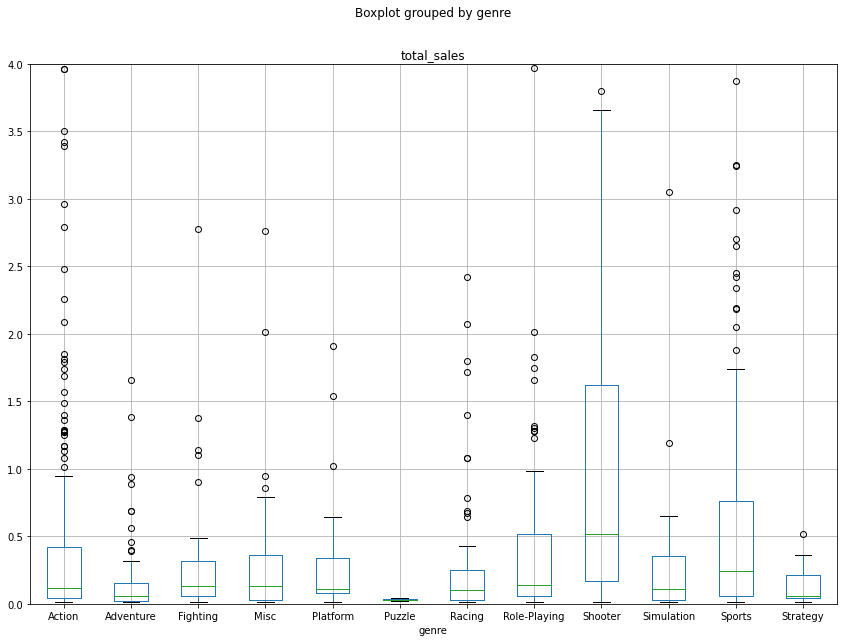

In [377]:
df_2014.boxplot(column='total_sales', by='genre', figsize=(14, 10))
plt.ylim(0, 4)

Самые популярные жанры: Action, Shooter, Sports самый непопулярный: Puzzle, что в принципе согласуется с моими личными наблюдениями. Однако если посмотреть на медианы, то жанры Спорт и шутер превосходят другие в том числе и экшн жанр, то есть их покупают на большие суммы. 

In [378]:
df_region = df_2014.pivot_table(index='platform', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
df_region

,eu_sales,jp_sales,na_sales
platform,,,
PC,17.97,0.00,7.23
PS3,25.54,11.22,22.05
PS4,130.04,15.02,98.61
Wii,2.59,0.00,2.08
X360,15.49,0.08,28.30
XOne,46.25,0.32,81.27


<AxesSubplot:xlabel='platform'>

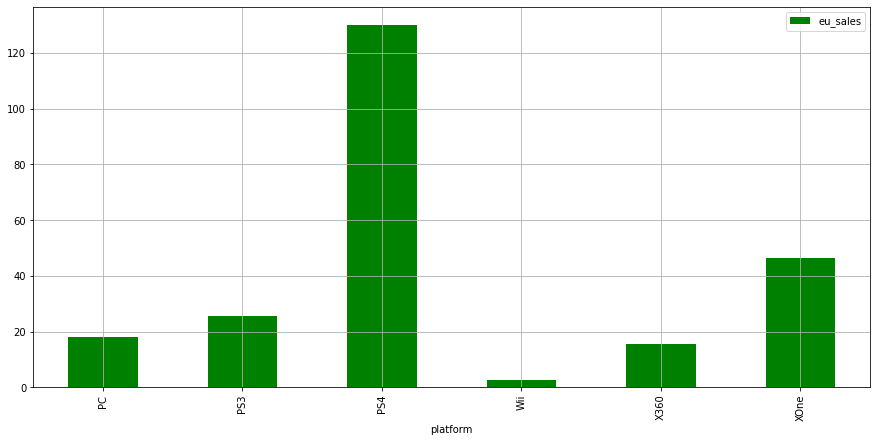

In [379]:
#df_region.plot.pie(y='eu_sales', figsize=(6, 6))
df_region.plot.bar(y='eu_sales', stacked=True, figsize=(15, 7), grid=True, color='green')

<AxesSubplot:xlabel='platform'>

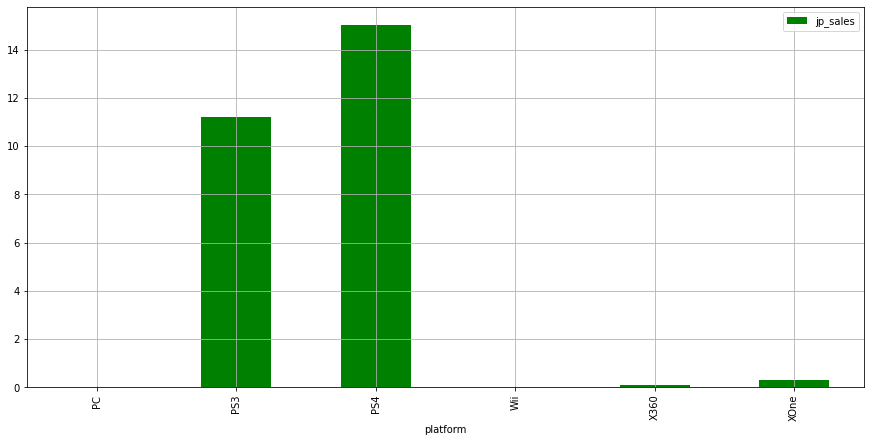

In [380]:
#df_region.plot.pie(y='jp_sales', figsize=(6, 6))
df_region.plot.bar(y='jp_sales', stacked=True, figsize=(15, 7), grid=True, color='green')

<AxesSubplot:xlabel='platform'>

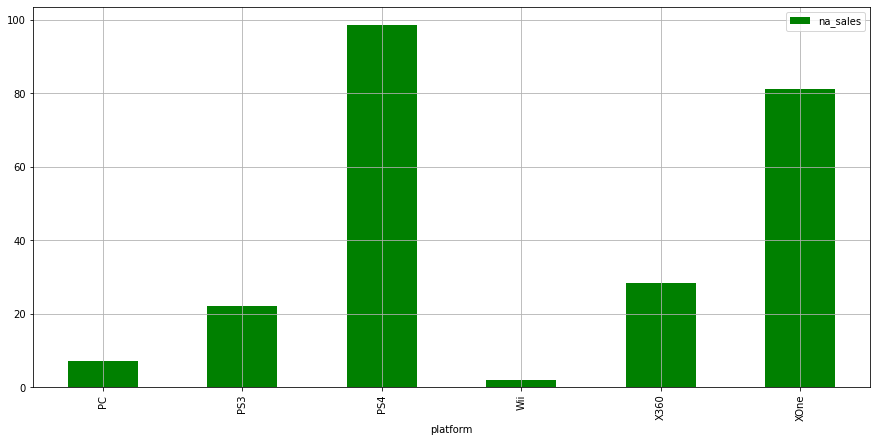

In [381]:
#df_region.plot.pie(y='na_sales', figsize=(6, 6))
df_region.plot.bar(y='na_sales', stacked=True, figsize=(15, 7), grid=True, color='green')

PS4 занимает первое место во всех регионах, однако второе место неоднородно в Северной америке и Европе это XOne, а в Японии PS3. 

In [382]:
df_region_genre = df_2014.pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
df_region_genre

,eu_sales,jp_sales,na_sales
genre,,,
Action,66.05,10.54,62.59
Adventure,6.04,0.85,4.97
Fighting,3.86,2.12,5.85
Misc,9.56,0.85,12.04
Platform,3.51,0.09,2.40
Puzzle,0.02,0.04,0.00
Racing,11.97,0.39,5.59
Role-Playing,20.38,6.02,20.98
Shooter,64.08,3.33,76.97


<AxesSubplot:ylabel='na_sales'>

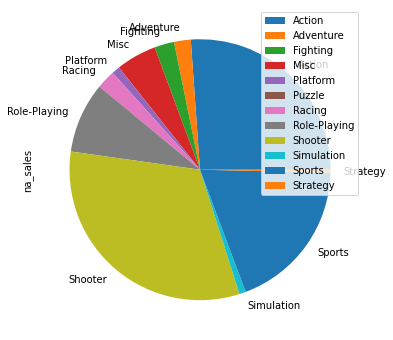

In [383]:
df_region_genre.plot.pie(y='na_sales', figsize=(6, 6))

<AxesSubplot:ylabel='jp_sales'>

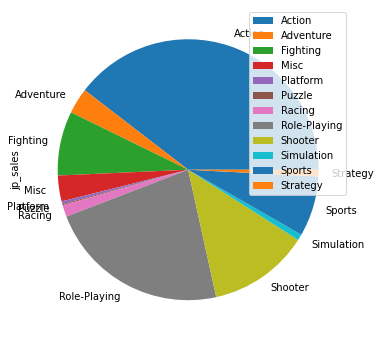

In [384]:
df_region_genre.plot.pie(y='jp_sales', figsize=(6, 6))

<AxesSubplot:ylabel='eu_sales'>

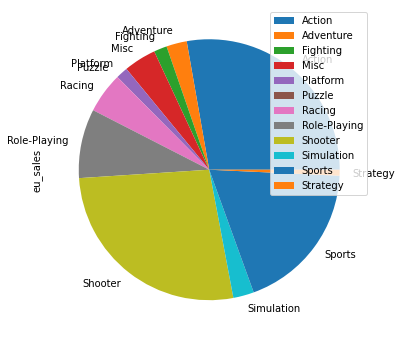

In [385]:
df_region_genre.plot.pie(y='eu_sales', figsize=(6, 6))

Ярко выделяется особенность японского региона. Ролплей игры там имеют очень весомую долю

In [386]:
df_rating = df_2014.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
df_rating

,eu_sales,jp_sales,na_sales
rating,,,
E,48.23,1.40,38.57
E10+,18.61,0.38,24.20
M,92.41,6.66,94.71
T,31.47,5.79,35.07


<AxesSubplot:xlabel='rating'>

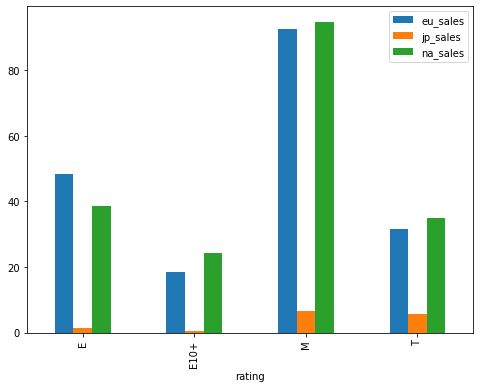

In [387]:
df_rating.plot(kind='bar', figsize=(8, 6), alpha=1)

<AxesSubplot:xlabel='rating'>

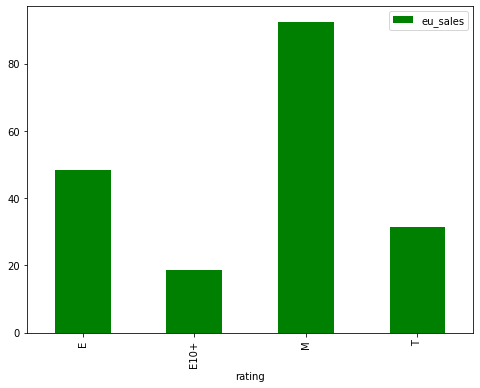

In [388]:
df_rating.plot(y='eu_sales', kind='bar', figsize=(8, 6), alpha=1, color='green')

<AxesSubplot:xlabel='rating'>

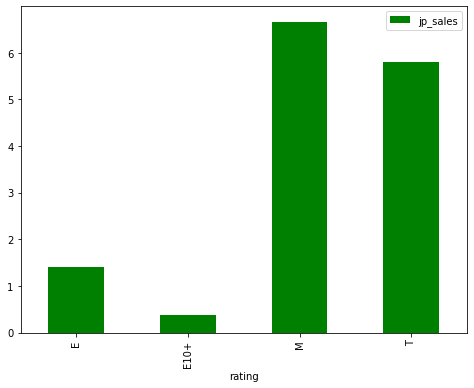

In [389]:
df_rating.plot(y='jp_sales', kind='bar', figsize=(8, 6), alpha=1, color='green')

<AxesSubplot:xlabel='rating'>

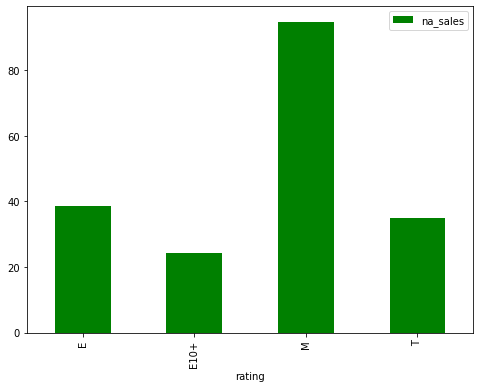

In [390]:
df_rating.plot(y='na_sales', kind='bar', figsize=(8, 6), alpha=1, color='green')

Во всех регионах игры преимущественно продаются с рейтингом М(1 место), 2 место в Северной америке и Европе занимают игры с рейтингом Е, а в Японии Т. Таким образом, влияние рейтинга есть, но только на Японию.

#После изменения актуального периода вывод по рейтингу не меняется, судя по гистораммам

H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
H1 - Средние пользовательские рейтинги платформ Xbox One и PC имеют существенные различия.

In [392]:
df_PC_2 = df_2014.query('platform == "PC" and user_score > 0')
df_XOne_2 = df_2014.query('platform == "XOne" and user_score > 0')
df_PC_2['user_score'] = df_PC_2['user_score'].fillna(0)
df_XOne_2['user_score'] = df_XOne_2['user_score'].fillna(0)# отсортирововыем нули
#Почему-то при наличии Nan в столбцах, p-value выдает Nan в своем значении

/tmp/ipykernel_31/373293007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PC_2['user_score'] = df_PC_2['user_score'].fillna(0)
/tmp/ipykernel_31/373293007.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_XOne_2['user_score'] = df_XOne_2['user_score'].fillna(0)# отсортирововыем нули


In [393]:
print(df_XOne_2['user_score'].mean())
print(df_PC_2['user_score'].mean())
alpha = 0.01 #Стандартная альфа
results = st.ttest_ind(df_XOne_2['user_score'], df_PC_2['user_score'])
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

6.594545454545456
6.298360655737705
p-value: 0.10450507919348415
Не отвергаем нулевую гипотезу


Не выявленны значимые отличия 

H0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые.
H1 - Средние пользовательские рейтинги жанров Action и Sports имеют существенные различия.

In [394]:
df_action = df_2014.query('genre == "Action" and user_score > 0')
df_sports = df_2014.query('genre == "Sports" and user_score > 0')# отсортирововыем нули
df_sports['user_score'] = df_sports['user_score'].fillna(0)
df_action['user_score'] = df_action['user_score'].fillna(0)
#Почему-то при наличии Nan в столбцах, p-value выдает Nan в своем значении

/tmp/ipykernel_31/3821460236.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sports['user_score'] = df_sports['user_score'].fillna(0)
/tmp/ipykernel_31/3821460236.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_action['user_score'] = df_action['user_score'].fillna(0)


In [395]:
print(df_action['user_score'].mean())
print(df_sports['user_score'].mean())
alpha = 0.01
results_2 = st.ttest_ind(df_action['user_score'], df_sports['user_score'])
print('p-value:', results_2.pvalue)

if results_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

6.67847533632287
5.181666666666667
p-value: 1.8308802058705039e-16
Отвергаем нулевую гипотезу


Имеют место существенные отличия

Итоговый вывод:
В ходе работы были обработанны данные: удалены пропуски, добавлен новый столбец, понижен регистр в некоторых столбцах значение tbd было изменено на Nan, по своему смыслу.

Для визуального отображения результатов использовались разные гистограммы и диограмма: plot, boxplot, plot.pie

Оказалось, что средний срок жизни игровой платформы: 5-6 лет, а активные продажи идут в течении 4-5 летю Самые популярные платформы X360,PS4, XOne, самая стабильная(неубиваемая) PC. Наибольшие перспективы имеют PS4, XOne, так как продажи X360 имеют тенденцию сильно падать.


В ходе исследования были проанализированы продажи в трех регионах: японском, североамериканском и европейском. Везде самая популярная платформа это PS4, однако вторая по популярности платформа в Североамериканском, европейском регионах и Японии разная в первом случае это XOne, во втором PS4. 


Что касается жанровых предпочтений выделилась Япония с любовью к ролевым играм. Американцы и европейцы практически одинаково предпочитают экшн, спорт и шутеры. Проанализировав медианы продаж можно сказать, что спорт и шутер жанр имеют большие перспективы, так как у них высокая медиана продаж.

M рейтинг оказался самым распространенным во всех регионах, однако в Японии в отличие от двух других регионах на 2 месте популярности стоит игры рейтинга Т.

В ходе Т-теста было выявлено существенное отличие между средних пользовательских рейтингов жанров экшн и спорт.

Также было установлено, что стоит обращать внимание на рейтинг критиков, но не слишком сильно, рейтинг пользователей в свою очередь вообще не влияет на продажи.

Рекомендации:
Делать упор в продажах на PS4 и XOne.
Учесть популярность игр рейтинга М.
Приоритетно выпускать игры в жанрах спорт и шутер(особенно в жанрах шутер).
Внимательно относится к японскому региону из-за его особенностей, отличий от других регионов.